In [16]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')
import top_k_insights.significance_tests as st
print(dir(st))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_distribution', 'linear_point', 'linear_shape', 'normal', 'np', 'powerlaw', 'scipy']


In [38]:
def simulate(n, filename, make_outlier=False):
    x = pd.DataFrame([10 * np.random.normal() + 15 for _ in range(n)], columns=['M'])
    
    if make_outlier:
        x['M'][x['M'].idxmax()] += 10

    x_max = max(x['M'])
    alpha = 1/n    
    
    x_mean = x['M'].mean()
    x_std = x['M'].std()
    x_max_Z = (x_max - x_mean)/x_std
    x_max_p = 1 - scipy.stats.norm.cdf(x_max_Z)

    x.hist(density=True, label='data from N(μ,σ)')
    plt.axvline(scipy.stats.norm.ppf(1-1/n) * x_std + x_mean, color='r', label='expected max val')
    plt.axvline(x_max, color='g', label='actual max val')

    # plot normal dist
    x_axis = np.arange(min(x['M']), max(x['M']), .001)
    plt.plot(x_axis, scipy.stats.norm.pdf(x_axis,x_mean,x_std), label='pdf of N(μ,σ)')
    # Mean = 0, SD = 2.
    plt.legend()
    plt.title("Point Significance Test for Gaussian Distribution")
    plt.savefig(filename)
    plt.show()

    print("significance:", max(1 - x_max_p / alpha, 0.0))
    print("x_max_p", x_max_p)
    print("alpha (1/n)", alpha)
    

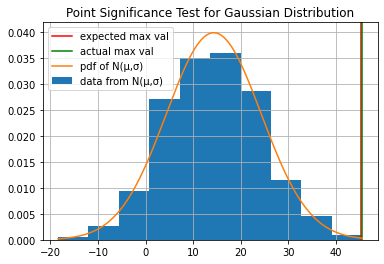

significance: 0.10364692703401701
x_max_p 0.000896353072965983
alpha (1/n) 0.001


In [43]:
simulate(1000, "./figs/normal-nonsig.png")

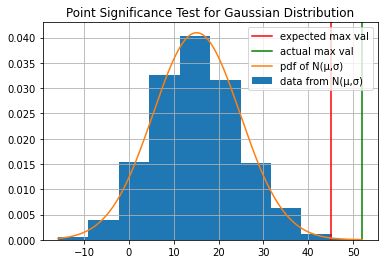

significance: 0.9264333828398188
x_max_p 7.35666171601812e-05
alpha (1/n) 0.001


In [37]:
simulate(1000, True)